# Pymaceuticals Inc.
---

### Analysis


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
mice_count = len(mouse_df["Mouse ID"].unique())

#Show the number of mice
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_df.loc[mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique() 

#Show the duplicate mice
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_df.loc[mouse_df["Mouse ID"] == "g989"]

#Show the duplicate mouse data
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[mouse_df["Mouse ID"].isin(duplicate_mice) == False]

#Show the clean mouse data
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_df["Mouse ID"].unique())

#Show the number of mice in the clean DataFrame
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Std. Dev.": std_dev,
                              "Tumor Volume Std. Err.": sem})

#Show the summary DataFrame
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

#Show the summary DataFrame
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

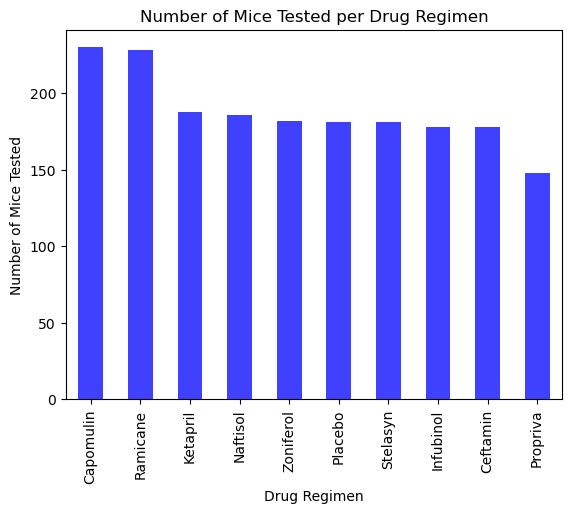

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Count the number of mice tested per drug regimen
regimen_df = clean_mouse_df["Drug Regimen"].value_counts()

#Plot in bar plot using Pandas
regimen_df.plot(kind="bar", color="b", alpha=0.75, align="center", width=0.5, 
                xlabel='Drug Regimen', ylabel='Number of Mice Tested', title='Number of Mice Tested per Drug Regimen')

#Show the bar plot
plt.show()


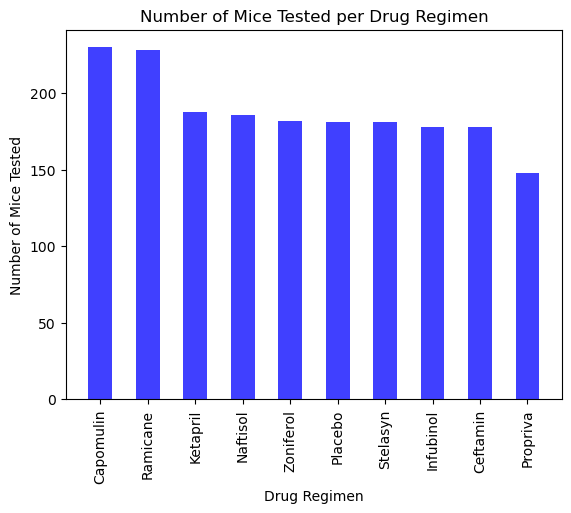

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_df.index, regimen_df.values, color="b", alpha=0.75, align="center", width=0.5)

#Rotate Ticks to avoid overlapping
plt.xticks(rotation=90)

#Set the title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#Show the plot
plt.show()

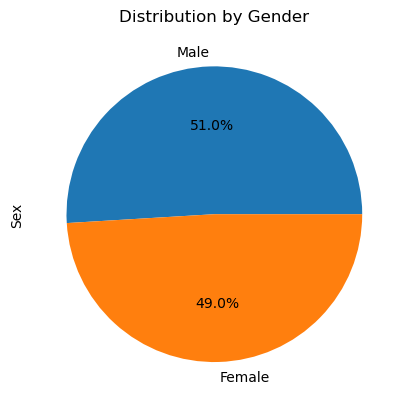

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Split the data by gender
gender_df = clean_mouse_df['Sex'].value_counts()

#Plot in pie chart using Pandas
gender_df.plot(kind="pie", autopct="%1.1f%%", title="Distribution by Gender")

#Change the y to reflect metric
plt.ylabel("Sex")

#Show the pie chart
plt.show()

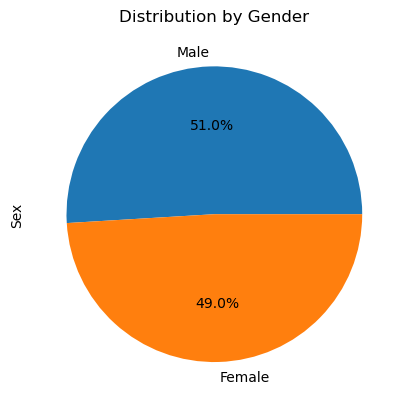

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df.values, labels=gender_df.index, autopct="%1.1f%%")

#Set the title
plt.title("Distribution by Gender")

#Change the y to reflect metric
plt.ylabel('Sex')

#Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_mouse_df, on=["Mouse ID", "Timepoint"], how="left")

#Show the final tumor volume
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    #Calculate the IQR
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    #Print the results
    print(f"{treatment} potential outliers: {outliers}")   

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


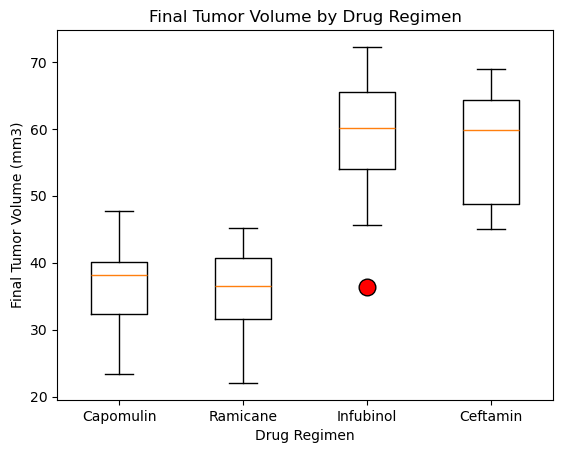

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"],
			 final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"],
			 final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"],
			 final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]], 
			labels=treatments, flierprops=dict(marker="o", markerfacecolor="r", markersize=12))

#Set the title and labels
plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

#Show the box plot
plt.show()

## Line and Scatter Plots

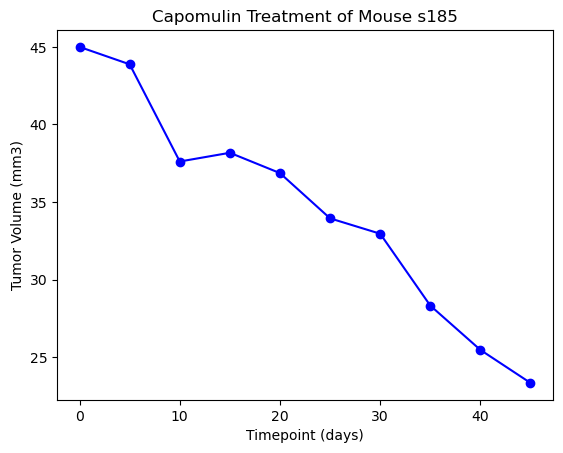

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Select a mouse treated with Capomulin
mouse = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "s185"]

#Plot the line chart
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker="o", color="b")

#Set the title and labels
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#Show the line chart
plt.show()

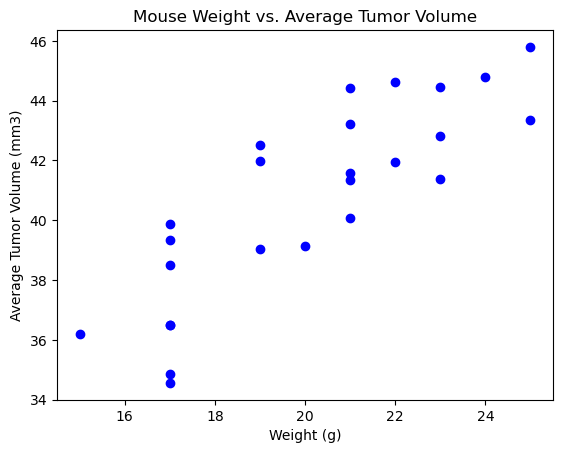

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Select the data for Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]

#Calculate the average tumor volume
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Calculate the weight of the mice
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()

#Plot the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color="b")

#Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show the scatter plot
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


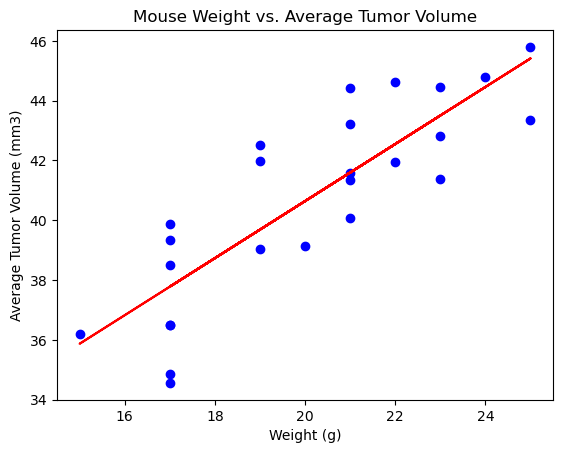

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)

#Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)

#Calculate the regression values
regress_values = mouse_weight * slope + intercept

#Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color="b")

#Plot the regression line
plt.plot(mouse_weight, regress_values, color="r")

#Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#Show the scatter plot
plt.show()
